# Tanzania dataset presentation

This notebook presents the [Open AI Tanzania dataset](https://blog.werobotics.org/2018/08/06/welcome-to-the-open-ai-tanzania-challenge/), released after a recent deep learning [challenge](https://competitions.codalab.org/competitions/20100), and used in this semantic segmentation project.

## Introduction

We begin basically with module imports:

In [1]:
import numpy as np
import os
import pandas as pd
import json
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
env DEEPOSL_CONFIG=../config.ini

env: DEEPOSL_CONFIG=../config.ini


In [3]:
from deeposlandia import utils
from deeposlandia.datasets import tanzania

In [4]:
DATAPATH = "../data"
DATASET = "tanzania"
IMG_SIZE = 384

## Metadata presentation

In this dataset, the goal is to predict three different classes: `complete`, `incomplete` and `foundation` buildings.

In order to do so, 17 annotated high-resolution images was released by during the Tanzania challenge, along with 13 images without annotations release for evaluation purpose. The image sizes come from 17k x 42k to 51k x 51k pixels, and the resolution is between 6 and 8 centimeters per pixel.

In [6]:
print("Number of training images: {}".format(len(os.listdir(os.path.join(DATAPATH, DATASET, "input", "training", "images")))))
print("Number of validation images: {}".format(len(os.listdir(os.path.join(DATAPATH, DATASET, "input", "validation", "images")))))
print("Number of testing images: {}".format(len(os.listdir(os.path.join(DATAPATH, DATASET, "input", "testing", "images")))))

Number of training images: 10
Number of validation images: 3
Number of testing images: 4


In order to train neural networks, we pre-processed all these images in smaller tiles of 384 x 384 pixels. We get naturally larger amounts of images for each folder.

In [8]:
print("Number of training images: {}".format(len(os.listdir(os.path.join(DATAPATH, DATASET, "preprocessed", str(IMG_SIZE), "training", "images")))))
print("Number of validation images: {}".format(len(os.listdir(os.path.join(DATAPATH, DATASET, "preprocessed", str(IMG_SIZE), "validation", "images")))))
print("Number of testing images: {}".format(len(os.listdir(os.path.join(DATAPATH, DATASET, "preprocessed", str(IMG_SIZE), "testing", "images")))))

Number of training images: 10728
Number of validation images: 3296
Number of testing images: 172


## Some examples

In [9]:
def show_example_image(image_filename):
    im = Image.open(os.path.join(DATAPATH, DATASET, "preprocessed", str(IMG_SIZE), "training", "images", image_filename))
    lab = Image.open(os.path.join(DATAPATH, DATASET, "preprocessed", str(IMG_SIZE), "training", "labels", image_filename))
    f, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(im)
    ax[1].imshow(lab)

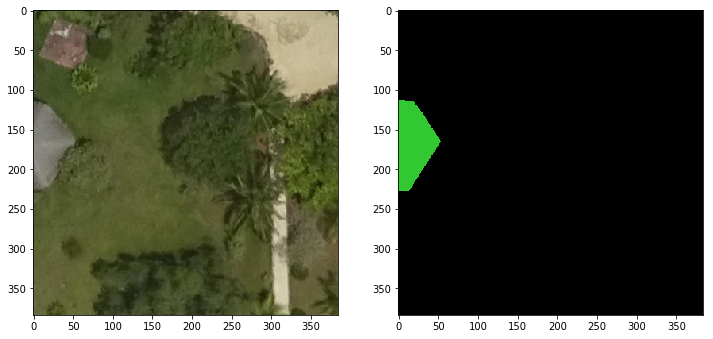

In [10]:
show_example_image("grid_001_384_384_4913_18838_ne.png")

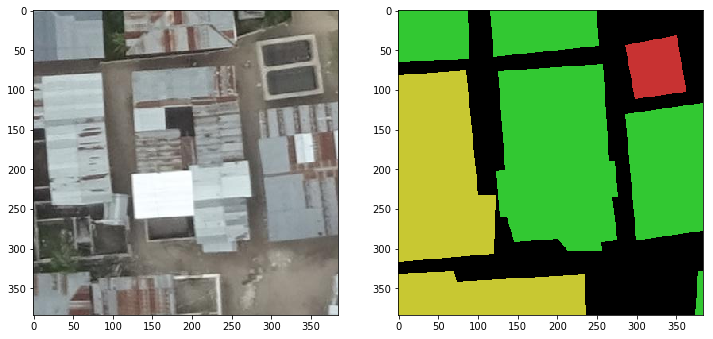

In [11]:
show_example_image("grid_001_384_384_9985_13737_nw.png")

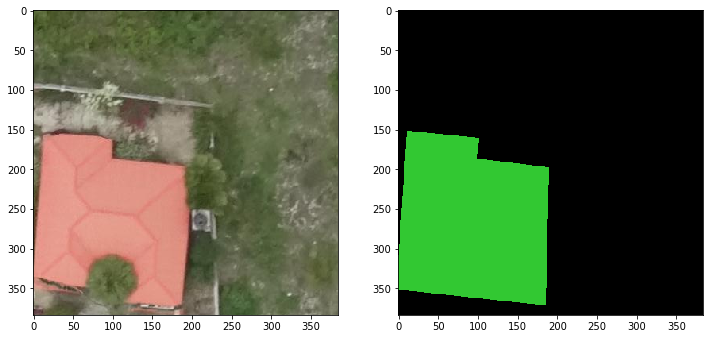

In [12]:
show_example_image("grid_001_384_384_10287_21518_sw.png")

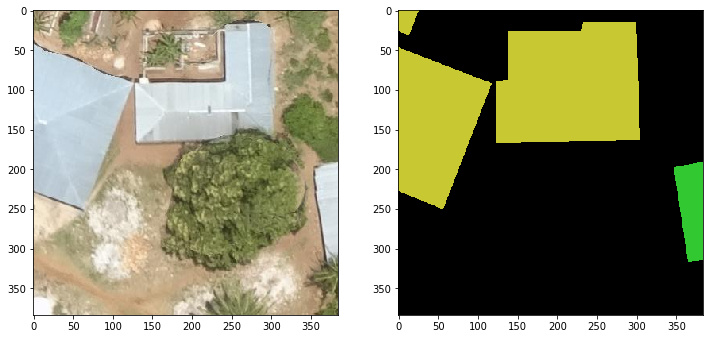

In [13]:
show_example_image("grid_042_384_384_32079_35534_nw.png")

## Dataset handling

Before to handle dataset, some folders are configured with accurate `utils` methods. We needs the folder where raw data are stored, as well as a bunch of folders for preprocessed data.

In [14]:
input_folder = utils.prepare_input_folder(DATAPATH, DATASET)
preprocess_folder = utils.prepare_preprocessed_folder(DATAPATH, DATASET, IMG_SIZE)

Here one can create easily a Tanzania dataset, in two steps. First, the dataset itself is created, without any image. However the labels are defined: one has pixels of different types (`background`, `complete`, `incomplete` or `foundation`).

In [15]:
d = tanzania.TanzaniaDataset(IMG_SIZE)
d.get_nb_labels(), d.get_nb_images()

(4, 0)

After creating the `Dataset` structure, one can add some preprocessed images, starting from the raw dataset.

In [16]:
d.populate(output_dir=preprocess_folder["training"],
           input_dir=os.path.join(input_folder, "training"),
           nb_images=100)
d.get_nb_images()

2019-05-28 11:17:13,734 :: INFO :: __init__ :: populate : Getting 10 images to preprocess...
2019-05-28 11:17:14,683 :: INFO :: tanzania :: _preprocess_for_training : Image filename: grid_001.tif, size: (3840, 3840)
2019-05-28 11:17:21,234 :: INFO :: tanzania :: _preprocess_for_training : Generate 13 images after 4 attempts.
2019-05-28 11:17:21,924 :: INFO :: tanzania :: _preprocess_for_training : Image filename: grid_022.tif, size: (3840, 3840)
2019-05-28 11:17:25,670 :: INFO :: tanzania :: _preprocess_for_training : Generate 1 images after 20 attempts.
2019-05-28 11:17:26,315 :: INFO :: tanzania :: _preprocess_for_training : Image filename: grid_023.tif, size: (3840, 3840)
2019-05-28 11:17:30,313 :: INFO :: tanzania :: _preprocess_for_training : Generate 1 images after 20 attempts.
2019-05-28 11:17:30,969 :: INFO :: tanzania :: _preprocess_for_training : Image filename: grid_028.tif, size: (3840, 3840)
2019-05-28 11:17:33,569 :: INFO :: tanzania :: _preprocess_for_training : Generate

34

As a remark, one can also populate the dataset with existing preprocessed images, starting from a preprocessed configuration file. This will erase existing dataset information, and replace it with those in the provided file.

In [17]:
d.load(preprocess_folder["training_config"], nb_images=50)
d.get_nb_images()

2019-05-28 11:18:43,942 :: INFO :: __init__ :: load : The dataset has been loaded from ../data/tanzania/preprocessed/384/training.json


50

As a final remark, one can notice that the label popularity, *i.e.* the proportion of images that depicts each of the labels, may be retrieved:

In [18]:
d.get_label_popularity()

array([1.  , 0.64, 0.16, 0.14])

In the last data sample, every image contain background pixel, 64% of them contains `complete` buildings, whereas only 16% and 14% contain `incomplete` and `foundation` buildings, respectively.